# Lineare Regression mit Python

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.read_csv('Advertising.csv')

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data=pd.read_csv('Advertising.csv')

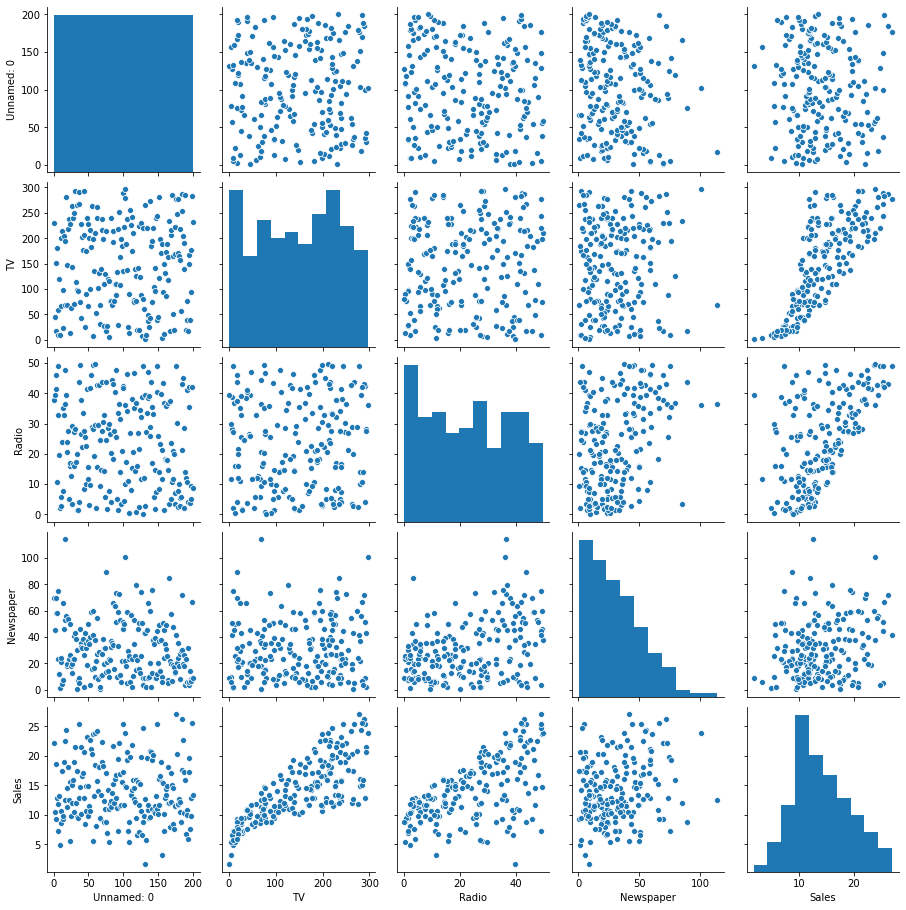

In [18]:
sns.pairplot(data=data)

In [4]:
#find the count of missing values from different column
data.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

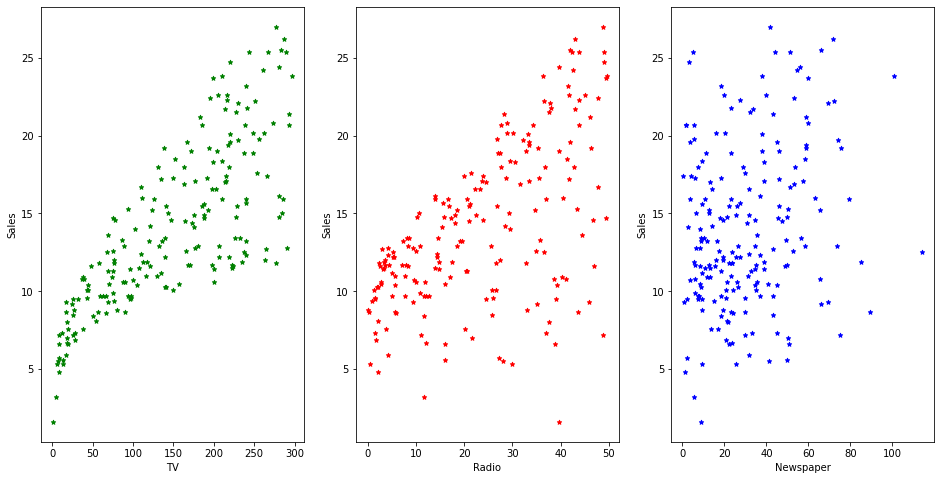

In [5]:
#visualize the relationship and the future and the response using sccaterplot 
fig,ax= plt.subplots(1,3,figsize=(16,8))
data.plot(kind='scatter',x='TV',y='Sales',ax=ax[0],color='g',marker='*')
data.plot(kind='scatter',x='Radio',y='Sales',ax=ax[1],color='r',marker='*')
data.plot(kind='scatter',x='Newspaper',y='Sales',ax=ax[2],color='b',marker='*')

# Train a linear regression model
We can now start training our linear regression model. To do this, we first need to split our data into an x array (containing the features) and a y array (containing the target variable). In this case, we want to predict the price (en. price), so this column is our target variable. We also omit the address column, since it contains only textual information that is of no use to the model.

## x and y arrays



In [21]:
from sklearn.model_selection import train_test_split
X=data[['TV','Radio','Newspaper']]
Y=data['Sales']
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.4,random_state=101)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [7]:
from sklearn.linear_model import LinearRegression
Im=LinearRegression()
Im.fit(X,Y)
print(Im.intercept_)
print(Im.coef_)

#y=mx+b
#intercept=b value in Resgression
#coeff=m value in regression

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [8]:
coeff=pd.DataFrame(Im.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


Interpretation of the coefficients:

#### Holding all other features constant then an increase in TV by 1 unit is associated with an increase of $0.04

Holding all other features constant, an increase in Radio  by 1 unit is associated with an increase of 0.18

Holding all other features constant, an increase of 1 unit in the Newspaper is associated with an increase of $0.001.




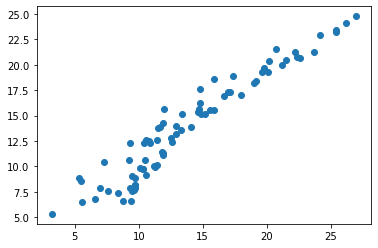

In [23]:
predictions=Im.predict(X_test)
plt.scatter(y_test,predictions)

Regressions Auswertungsmetriken
Hier sind drei der üblichen Metriken zur Auswertung von Regressions Aufgaben:

Mean Absolute Error (MAE) ist der Durchschnitt des absoluten Werts der Errors:

1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|
 
Mean Squared Error (MSE) ist der Durchschnitt der quadrierten Errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2
 
Root Mean Squared Error (RSME) ist die Quadratwurzel des Durchschnitts der quardrierten Errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
 
Diese Matriken vergleichen:

MAE ist am leichtesten zu verstehen, da sie den durchschnittlichen Error angibt
MSE ist verbreiteter, da MSE die größeren Errors "bestraft", was in der realen Welt nützlich ist
RSME ist sogar noch verbreiteter als MSE, da RMSE in "y" Einheiten interpretierbar ist
Alle drei sind sogenannte loss functions, da wir sie minimieren wollen!

In [24]:
from sklearn import metrics

In [26]:
print('Mean Absolute Error (MAE) : ',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error (RSME) :',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute Error (MAE) :  1.2812321981259793
Mean Squared Error (MSE):  2.4616618485260693
Root Mean Squared Error (RSME) : 1.5689684026538167


# after receiving all the Coefficient lets check the statistical model 

In [9]:
import statsmodels.formula.api as smf
Im=smf.ols(formula='Sales~TV+Radio+Newspaper',data=data).fit()
Im.conf_int()
Im.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.58e-96
Time:                        16:21:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# feature selection
How do i decide whice features have to included in a linear model ?
.Try defferent models, and only keep predictors in the model is they have small P-values.
.Check if the R-squerd value goes up when you add new predictors to the model.

if there are many culamn in data set then better check Adjasted R-Squered.


In [10]:
Im =smf.ols(formula='Sales ~ TV+Radio',data=data).fit()
Im.rsquared

0.8971942610828957

In [11]:
Im =smf.ols(formula='Sales ~ TV+Radio+Newspaper',data=data).fit()
Im.rsquared


0.8972106381789522

# Catagorical data prediction

In [12]:
np.random.seed(12345)
nums=np.random.rand(len(data))
mask_large=nums > 0.5
data['scale']='small'
data.loc[mask_large,'scale']=='large'
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,scale
0,1,230.1,37.8,69.2,22.1,small
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,small
